# Recency-Frequency-Monetary

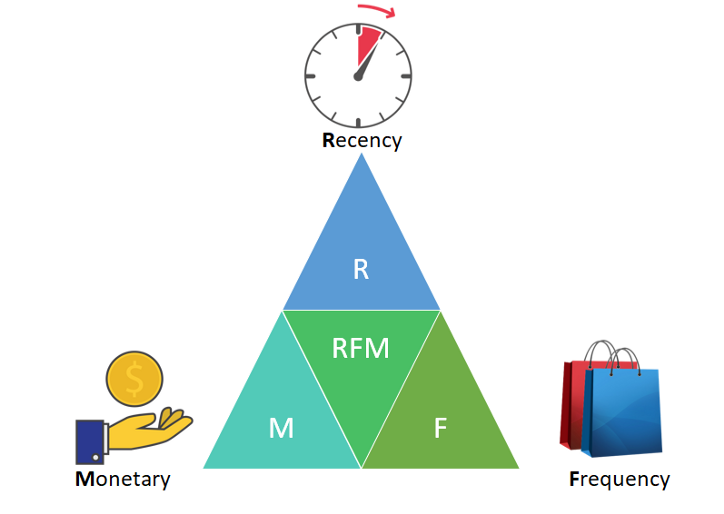

The dataset named "Online Retail II" includes the sales of a UK-based online store between 01/12/2009–09/12/2011. This company sells souvenirs. Think of it as promotional items. Most of their customers are wholesalers.

# Variables
● InvoiceNo - Invoice Number
If this code starts with C, it means that the operation is canceled.

● StockCode - Product Code
Unique number for each product.

● Description - Product Name

●Quantity - Number of Products
It expresses how many of the products on the invoices have been sold.

● InvoiceDate - Invoice Date

● UnitPrice - Invoice Price (Sterling)

● CustomerID - Unique Customer Number

● Country - Country Name

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-online-retail-ii-data-set/online_retail_II.xlsx


# What is RFM Analysis?

The RFM model is a customer segmentation technique. RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer's behavior because frequency and monetary value affects a customer's lifetime value, and recency affects retention, a measure of engagement.

# Data Understanding

In [2]:
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 926 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('/kaggle/input/uci-online-retail-ii-data-set/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [5]:
df_ = df.copy()

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


In [7]:
df.shape

(541910, 8)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.00000,9.55223,218.08096,-80995.00000,1.00000,3.00000,10.00000,80995.00000
Price,541910.00000,4.61114,96.75977,-11062.06000,1.25000,2.08000,4.13000,38970.00000
Customer ID,406830.00000,15287.68416,1713.60307,12346.00000,13953.00000,15152.00000,16791.00000,18287.00000


In [9]:
df["Description"].nunique() # what is the number of unique products?

4223

In [10]:
df["Description"].value_counts().head() # how many products are there?

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [11]:
df.groupby("Description").agg({"Quantity":"sum"}).head() # what is the most ordered product?

,Quantity
Description,
20713,-400
4 PURPLE FLOCK DINNER CANDLES,144
50'S CHRISTMAS GIFT BAG LARGE,1913
DOLLY GIRL BEAKER,2448
I LOVE LONDON MINI BACKPACK,389


In [12]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head() #how do we sort the output above?

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [13]:
df["Invoice"].nunique() #how many invoices have been cut in total?

25900

In [14]:
# how much money has been earned per invoice? (it is necessary to create a new variable by multiplying two variables)
#to find out how much money has been earned, "quantity * price" must be made.
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [15]:
df.head() # Dataframe" Total Price " variable added. This variable was studied through the first 5 observations.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


In [16]:
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head() #calculated the total amount of money earned per invoice.

,TotalPrice
Invoice,
536365,139.12000
536366,22.20000
536367,278.73000
536368,70.05000
536369,17.85000


In [17]:
df.groupby("Description").agg({"Price":"max"}).sort_values("Price", ascending = False).head() # what are the most expensive products?

,Price
Description,
Manual,38970.00000
AMAZON FEE,17836.46000
Adjust bad debt,11062.06000
POSTAGE,8142.75000
DOTCOM POSTAGE,4505.17000


In [18]:
df.sort_values("Price", ascending = False).head() # what are the most expensive products?

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00000,15098.00000,United Kingdom,-38970.00000
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46000,NaN,United Kingdom,-17836.46000
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02000,NaN,United Kingdom,-16888.02000
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71000,NaN,United Kingdom,-16453.71000
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33000,NaN,United Kingdom,-13541.33000


In [19]:
df["Country"].value_counts().head() #how many orders came from what country?

United Kingdom    495478
Germany             9495
France              8558
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [20]:
returned = df[df["Invoice"].str.contains("C",na=False)]
returned.sort_values("Quantity", ascending = True).head() # which product gets the most returns?

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08000,16446.00000,United Kingdom,-168469.60000
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04000,12346.00000,United Kingdom,-77183.60000
4268,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03000,15838.00000,United Kingdom,-280.80000
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10000,15749.00000,United Kingdom,-6539.40000
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85000,15749.00000,United Kingdom,-3700.00000


# Incomplete Observation Analysis

In [21]:
df.isnull().sum() #Its asks the question of whether there are any missing observations

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
TotalPrice          0
dtype: int64

In [22]:
df.dropna(inplace=True) #erases incomplete observations.

df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


# Customer Segmentation

In [23]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [24]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [25]:
today_date = dt.datetime(2011, 12, 11)


rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00000,326,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,19,1,1757.55000
12350.00000,311,1,334.40000


In [26]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [27]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [28]:
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

rfm.head()

rfm.describe().T

rfm[rfm["RFM_SCORE"] == "55"].head()

rfm[rfm["RFM_SCORE"] == "11"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.00000,326,1,77183.60000,1,1,5,11
12350.00000,311,1,334.40000,1,1,2,11
12353.00000,205,1,89.00000,1,1,1,11
12354.00000,233,1,1079.40000,1,1,4,11
12355.00000,215,1,459.40000,1,1,2,11


In [29]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
# Here classes are assigned according to rfm scores. Below is the December score for these classes.
# As an example, the Hibernating class has the following score values.
# The Recency value is 1-2, the Frequency value is 1-2, which is read this way in other classes.
#The reason why only Recency and Frequency are added here is because only these two parameters are included in the table, but Monetary can also be added to them.

In [30]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.00000,326,1,77183.60000,1,1,5,11,hibernating
12347.00000,3,7,4310.00000,5,5,5,55,champions
12348.00000,76,4,1797.24000,2,4,4,24,at_Risk
12349.00000,19,1,1757.55000,4,1,4,41,promising
12350.00000,311,1,334.40000,1,1,2,11,hibernating


In [31]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency         monetary      
                         mean count      mean count       mean count
segment                                                             
about_to_sleep       53.31250   352   1.16193   352  471.99437   352
at_Risk             153.78583   593   2.87690   593 1084.53530   593
cant_loose          132.96825    63   8.38095    63 2796.15587    63
champions             6.36177   633  12.41390   633 6857.96392   633
hibernating         217.60504  1071   1.10177  1071  488.64331  1071
loyal_customers      33.60806   819   6.47985   819 2864.24779   819
need_attention       52.42781   187   2.32620   187  897.62786   187
new_customers         7.42857    42   1.00000    42  388.21286    42
potential_loyalists  17.39876   484   2.01033   484 1041.22200   484
promising            23.51064    94   1.00000    94  294.00798    94

In [32]:
rfm[rfm["segment"] == "need_attention"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12360.00000,53,3,2662.06000,3,3,5,33,need_attention
12372.00000,72,3,1298.04000,3,3,4,33,need_attention
12413.00000,67,3,758.10000,3,3,3,33,need_attention
12456.00000,45,3,3181.04000,3,3,5,33,need_attention
12536.00000,44,3,12601.83000,3,3,5,33,need_attention


In [33]:
rfm[rfm["segment"] == "new_customers"].index

Float64Index([12367.0, 12442.0, 12478.0, 12479.0, 12558.0, 12587.0, 12650.0,
              12660.0, 12713.0, 12953.0, 12966.0, 13017.0, 13153.0, 13188.0,
              13298.0, 13349.0, 13428.0, 13436.0, 13560.0, 13790.0, 13844.0,
              14087.0, 14093.0, 14204.0, 14219.0, 14349.0, 14480.0, 14569.0,
              14578.0, 14601.0, 14804.0, 14954.0, 15097.0, 15148.0, 15195.0,
              15318.0, 15471.0, 15520.0, 15539.0, 15540.0, 15619.0, 15721.0],
             dtype='float64', name='Customer ID')

In [34]:
new_df = pd.DataFrame()
new_df["new_customer_id"] = rfm[rfm["segment"] == "new_customers"].index

new_df.to_csv("new_customers.csv")

# Recency Score

In [35]:
df["InvoiceDate"].min() 

Timestamp('2010-12-01 08:26:00')

# Functionalization of the Process

In [36]:
def create_rfm(dataframe):

    # PREPARING THE DATA
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[(dataframe['Quantity'] > 0)]
    dataframe = dataframe[(dataframe['Price'] > 0)]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]

    # CALCULATION OF RFM METRICS
    today_date = dt.datetime(2011, 12, 11)
    rfm = dataframe.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})
    rfm.columns = ['recency', 'frequency', "monetary"]
    rfm = rfm[(rfm['monetary'] > 0)]

    # CALCULATION OF RFM SCORES
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
    rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])


    rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                        rfm['frequency_score'].astype(str))


    # NAMING OF SEGMENTS
    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "segment"]]
    return rfm

df = df_.copy()
rfm_new = create_rfm(df)
rfm_new.head()

,recency,frequency,monetary,segment
Customer ID,,,,
12346.00000,326,1,77183.60000,hibernating
12347.00000,3,7,4310.00000,champions
12348.00000,76,4,1797.24000,at_risk
12349.00000,19,1,1757.55000,promising
12350.00000,311,1,334.40000,hibernating


In [37]:
rfm_final=create_rfm(df_)

In [38]:
rfm_final.head()

,recency,frequency,monetary,segment
Customer ID,,,,
12346.00000,326,1,77183.60000,hibernating
12347.00000,3,7,4310.00000,champions
12348.00000,76,4,1797.24000,at_risk
12349.00000,19,1,1757.55000,promising
12350.00000,311,1,334.40000,hibernating
